In [1]:
from scrape import extract_tweets

df = extract_tweets(2000, 'Nigeria')

c:\Users\abedn\Downloads\Post_Election_Data_Analysis\scrape.py:12: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  analysis = TextBlob(tweet.content)
c:\Users\abedn\Downloads\Post_Election_Data_Analysis\scrape.py:15: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, polarity, subjectivity])


In [2]:
import demoji
import re

In [3]:
df.head()

,Datetime,Tweet Id,Text,Username,Polarity,Subjectivity
0,2023-02-28 23:59:53+00:00,1630719471017967617,You know what’s most interesting? \n\nI’ve not...,MrJuniorEbong,0.500000,0.500000
1,2023-02-28 23:52:44+00:00,1630717670814367747,God help us make 🙏 Peter Obi win this election...,MuhammedUkasha6,0.800000,0.400000
2,2023-02-28 23:51:42+00:00,1630717410272477190,"I expected LP to learn from this election, the...",babangidarimi1,0.050000,0.216667
3,2023-02-28 23:51:26+00:00,1630717343037898753,Please what really is the point of this ritual...,Obelezeliora,0.220000,0.490000
4,2023-02-28 23:46:29+00:00,1630716097337991169,@Abdul_Ajikobi @jrnaib2 Yet is bcoz of a local...,Aminu__Adam,0.266667,0.466667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Datetime      2001 non-null   datetime64[ns, UTC]
 1   Tweet Id      2001 non-null   int64              
 2   Text          2001 non-null   object             
 3   Username      2001 non-null   object             
 4   Polarity      2001 non-null   float64            
 5   Subjectivity  2001 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 93.9+ KB


In [8]:
df['Text']

0       You know what’s most interesting? \n\nI’ve not...
1       God help us make 🙏 Peter Obi win this election...
2       I expected LP to learn from this election, the...
3       Please what really is the point of this ritual...
4       @Abdul_Ajikobi @jrnaib2 Yet is bcoz of a local...
                              ...                        
996     Bauchi and gombe presidential election results...
997     2023 Presidential Election Results. Kaduna sta...
998     RESULT: Kaduna Presidential election \n\nAPC =...
999     @theageofbill_f Exactly the point. Especially ...
1000    Nigeria is the only country were professors ri...
Name: Text, Length: 1001, dtype: object

In [5]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'https?://\S+', '', x)) # remove URLs
df['Text'] = df['Text'].apply(lambda x: re.sub(r'@[A-Za-z0-9_]+', '', x)) # remove mentions
df['Text'] = df['Text'].apply(lambda x: re.sub(r'#[A-Za-z0-9_]+', '', x)) # remove hashtags

df['Text'] = df['Text'].apply(lambda x: re.sub(r'^RT[\s]+', '', x))

# Remove emojis and special characters
demoji.download_codes() # download emoji dictionary

df['Text'] =  df['Text'].apply(lambda x: demoji.replace(x, '')) # remove emojis
df['Text'] =  df['Text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', x)) # remove special characters
df['Text'] =  df['Text'].apply(lambda x: x.lower())


C:\Users\abedn\AppData\Local\Temp\ipykernel_13860\2670652402.py:8: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes() # download emoji dictionary


In [10]:
df['Text']

0       you know whats most interesting \n\nive not se...
1         god help us make  peter obi win this election  
2       i expected lp to learn from this election then...
3       please what really is the point of this ritual...
4         yet is bcoz of a local champion that a giant...
                              ...                        
996     bauchi and gombe presidential election results...
997     2023 presidential election results kaduna stat...
998     result kaduna presidential election \n\napc  3...
999      exactly the point especially with the electio...
1000    nigeria is the only country were professors ri...
Name: Text, Length: 1001, dtype: object

In [6]:
df.head()

,Datetime,Tweet Id,Text,Username,Polarity,Subjectivity
0,2023-02-28 23:59:53+00:00,1630719471017967617,you know whats most interesting \n\nive not se...,MrJuniorEbong,0.500000,0.500000
1,2023-02-28 23:52:44+00:00,1630717670814367747,god help us make peter obi win this election,MuhammedUkasha6,0.800000,0.400000
2,2023-02-28 23:51:42+00:00,1630717410272477190,i expected lp to learn from this election then...,babangidarimi1,0.050000,0.216667
3,2023-02-28 23:51:26+00:00,1630717343037898753,please what really is the point of this ritual...,Obelezeliora,0.220000,0.490000
4,2023-02-28 23:46:29+00:00,1630716097337991169,yet is bcoz of a local champion that a giant...,Aminu__Adam,0.266667,0.466667


### EDA 

(-0.5, 399.5, 199.5, -0.5)

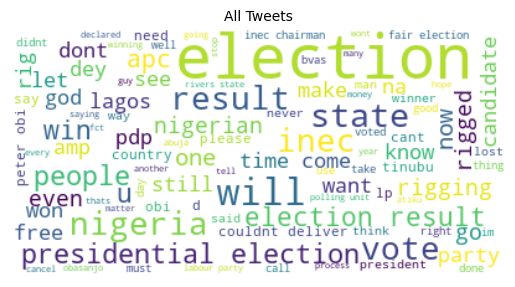

In [7]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt

tweet_All = " ".join(review for review in df.Text)

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)


plt.imshow(wordcloud_ALL, interpolation='bilinear')#
plt.title('All Tweets', fontsize=10)
plt.axis('off')

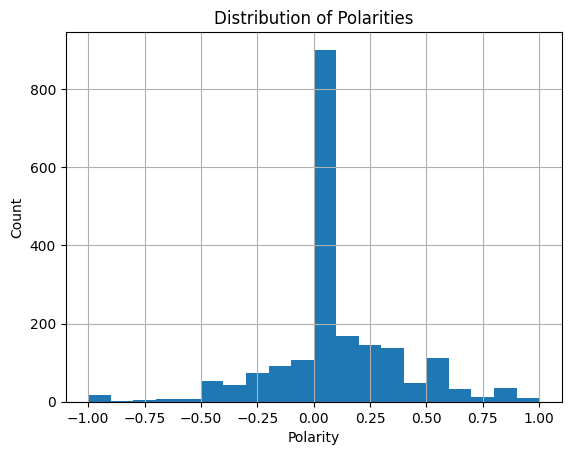

In [9]:
# Visualize the distribution of polarities
df["Polarity"].hist(bins=20)
plt.title("Distribution of Polarities")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

In [12]:

# Calculate the average subjectivity
avg_subjectivity = df["Subjectivity"].mean()
print("Average Subjectivity:", avg_subjectivity)

Average Subjectivity: 0.37104012644536133


In [15]:
# Print the most positive and negative tweets
positive_tweet = df.loc[df["Polarity"].idxmax()]["Text"]
negative_tweet = df.loc[df["Polarity"].idxmin()]["Text"]
print("Most Positive Tweet:", positive_tweet)
print("Most Negative Tweet:", negative_tweet)

Most Positive Tweet:  this election na do your best and rig the rest
Most Negative Tweet: worst election ever


#### Word Frequency Analysis

In [19]:
from collections import Counter
import re
import nltk

In [26]:
texts = [tweet for tweet in df.Text]
words = [word.lower() for text in texts for word in text.split()]

# Remove punctuation and stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))
words = [re.sub(r"[^\w\s]", "", word) for word in words if word not in stopwords]

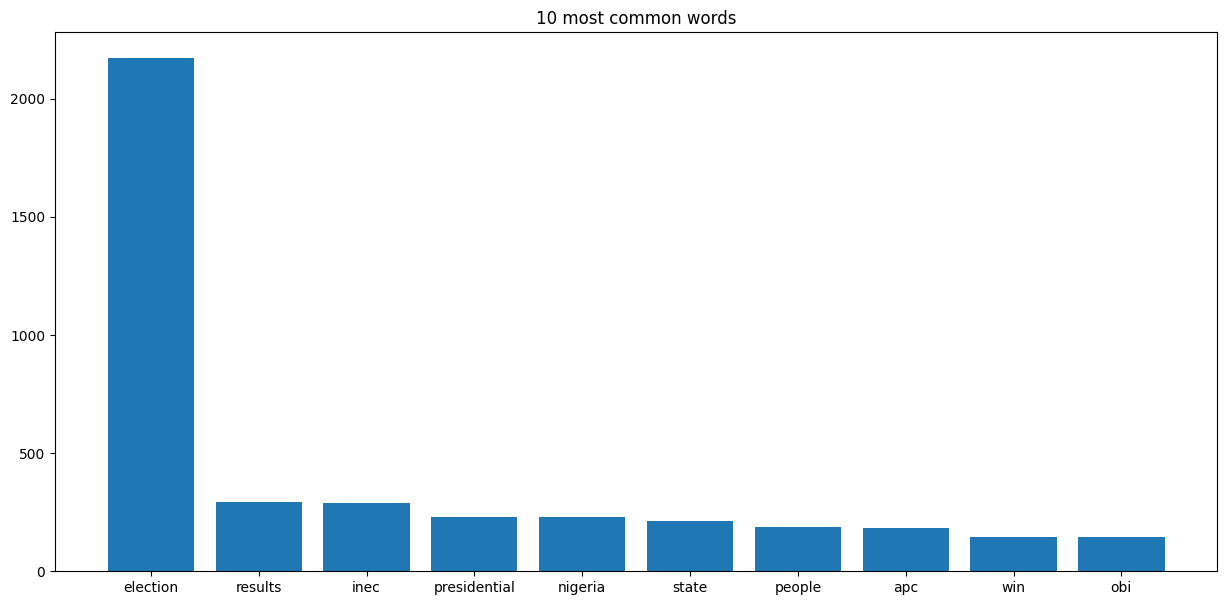

In [27]:
# Count word frequencies
word_counts = Counter(words)
words = []
counts = []
# Print the 10 most common words
for word, count in word_counts.most_common(10):
    words.append(word)
    counts.append(count)

plt.figure(figsize=(15,7))
plt.bar(words, counts)
plt.title('10 most common words')
plt.show()

### Hash Tag Analysis

In [39]:
df2 = extract_tweets(500, 'Nigeria')

# Extract the hashtags from the tweets
df2["hashtags"] = df2["Text"].apply(lambda x: [tag.strip("#") for tag in x.split() if tag.startswith("#")])

# Count the frequency of each hashtag
hashtag_counts = {}
for hashtags in df2["hashtags"]:
    for hashtag in hashtags:
        if hashtag in hashtag_counts:
            hashtag_counts[hashtag] += 1
        else:
            hashtag_counts[hashtag] = 1

# Print the 10 most common hashtags
top_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)[:10]
for hashtag, count in top_hashtags:
    print(f"{hashtag}: {count}")


c:\Users\abedn\Downloads\Post_Election_Data_Analysis\scrape.py:12: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  analysis = TextBlob(tweet.content)
c:\Users\abedn\Downloads\Post_Election_Data_Analysis\scrape.py:15: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, polarity, subjectivity])


INECElectionResult: 21
electionresults2023: 18
NigeriaDecides2023: 9
NigerianElections2023: 9
ElectionResult: 7
CongratulationsObidatti: 6
NigeriaDecide2023: 6
protest: 5
2023GeneralElections: 5
NigeriaElection2023: 5


### Time Series Analysis

In [47]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob

country_code = 'Nigeria'
num_of_tweets = 1500

tweets_list = []
for i , tweet in enumerate(sntwitter.TwitterSearchScraper('Election near:"{}" since:2023-02-25 until:2023-03-01'.format(country_code)).get_items()):
        if i > num_of_tweets:
            break
        analysis = TextBlob(tweet.content)
        timeStamp = tweet.date
        polarity = analysis.sentiment.polarity
        tweets_list.append([polarity, timeStamp])

C:\Users\abedn\AppData\Local\Temp\ipykernel_13860\1800169863.py:12: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  analysis = TextBlob(tweet.content)


In [48]:
df3 = pd.DataFrame(tweets_list, columns=['Polarity', 'Date'])

<Axes: xlabel='Date'>

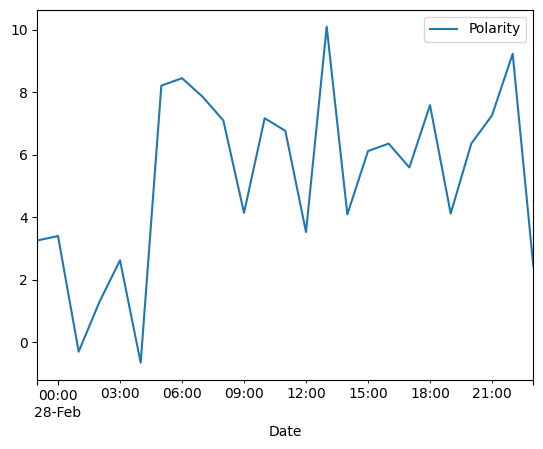

In [49]:
# Resample the dataframe to hourly intervals
df3.set_index("Date", inplace=True)
df_hourly = df3.resample("H").sum()
df_weekly =  df3.resample("W").sum()

# Plot the time series of polarity
df_hourly.plot()


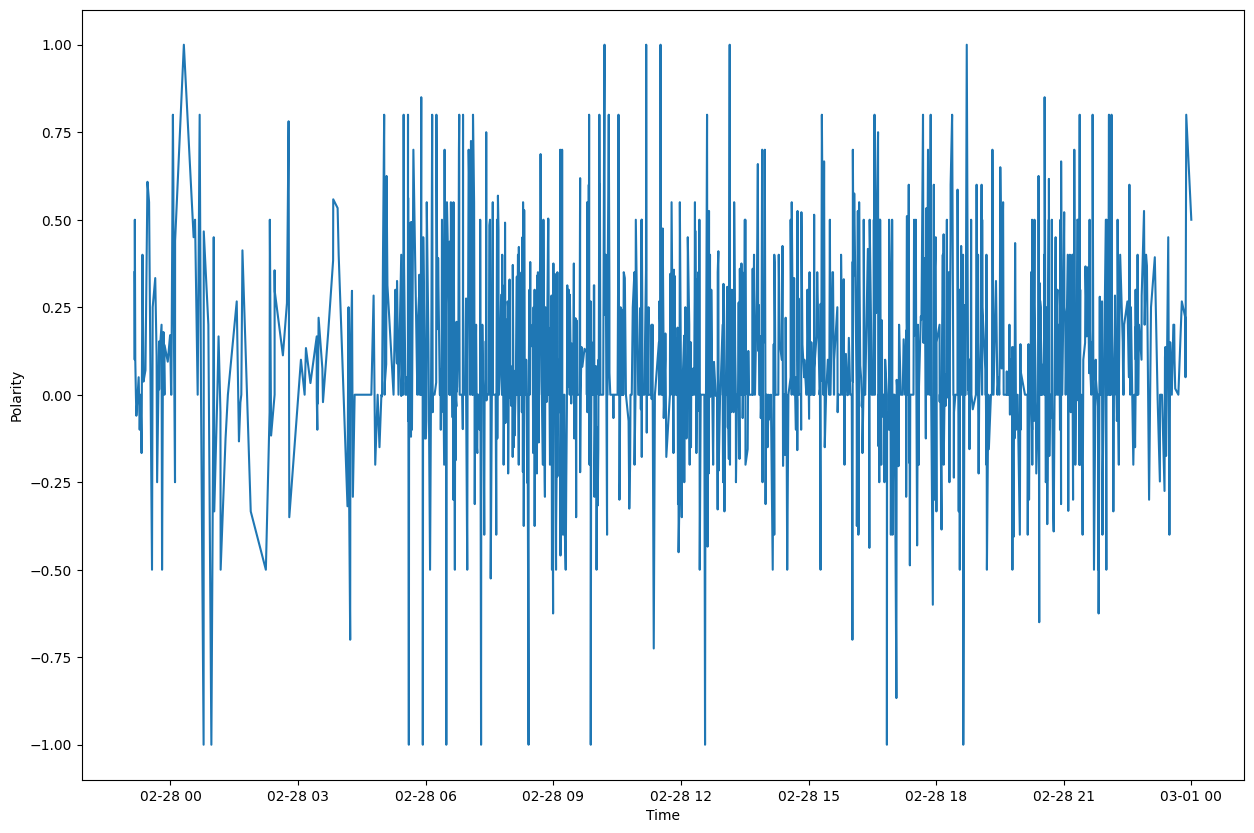

In [55]:
plt.figure(figsize=(15,10))
plt.plot(df3.index, df3["Polarity"])
plt.xlabel("Time")
plt.ylabel("Polarity")
plt.show()

### Sentiment Analysis

In [56]:
sentiments = [i for i in df3.Polarity]

avg_sentiment = sum(sentiments)/len(sentiments)

print(f'The average sentiment is {avg_sentiment}')

The average sentiment is 0.08798706396221068


In [58]:
df.head()

,Datetime,Tweet Id,Text,Username,Subjectivity
Polarity,,,,,
0.500000,2023-02-28 23:59:53+00:00,1630719471017967617,you know whats most interesting \n\nive not se...,MrJuniorEbong,0.500000
0.800000,2023-02-28 23:52:44+00:00,1630717670814367747,god help us make peter obi win this election,MuhammedUkasha6,0.400000
0.050000,2023-02-28 23:51:42+00:00,1630717410272477190,i expected lp to learn from this election then...,babangidarimi1,0.216667
0.220000,2023-02-28 23:51:26+00:00,1630717343037898753,please what really is the point of this ritual...,Obelezeliora,0.490000
0.266667,2023-02-28 23:46:29+00:00,1630716097337991169,yet is bcoz of a local champion that a giant...,Aminu__Adam,0.466667


In [59]:
df['Polarity'] = df.index

In [60]:
df.head()

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity
Polarity,,,,,,
0.500000,2023-02-28 23:59:53+00:00,1630719471017967617,you know whats most interesting \n\nive not se...,MrJuniorEbong,0.500000,0.500000
0.800000,2023-02-28 23:52:44+00:00,1630717670814367747,god help us make peter obi win this election,MuhammedUkasha6,0.400000,0.800000
0.050000,2023-02-28 23:51:42+00:00,1630717410272477190,i expected lp to learn from this election then...,babangidarimi1,0.216667,0.050000
0.220000,2023-02-28 23:51:26+00:00,1630717343037898753,please what really is the point of this ritual...,Obelezeliora,0.490000,0.220000
0.266667,2023-02-28 23:46:29+00:00,1630716097337991169,yet is bcoz of a local champion that a giant...,Aminu__Adam,0.466667,0.266667


In [61]:
df.reset_index(drop=True, inplace=True)#

In [63]:
import numpy as np
df['Sentiment'] = np.where(df['Polarity'] > 0, 1, np.where(df['Polarity'] < 0 , -1, 0))

In [65]:
df.tail()

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity,Sentiment
1996,2023-02-27 18:00:03+00:00,1630266525377613828,people will applaud and celebrate crime as lon...,morich20,0.40,-0.05,-1
1997,2023-02-27 17:59:13+00:00,1630266318971650050,this guy is spitting facts he is exposing all ...,MrJuniorEbong,0.00,0.00,0
1998,2023-02-27 17:58:50+00:00,1630266220250316800,all this hands shake \npls what is it for\nhop...,Ifechuk50639910,0.95,0.75,1
1999,2023-02-27 17:58:42+00:00,1630266187928989697,having rigged the election \ncan they now plea...,oguguolamobi,0.00,0.00,0
2000,2023-02-27 17:57:47+00:00,1630265956353097728,all this hands shake \npls what is it for\nho...,Ifechuk50639910,0.95,0.75,1


In [66]:
df['Sentiment'].value_counts()

Sentiment
 1    870
 0    730
-1    401
Name: count, dtype: int64

### EDA

In [67]:
df_positive = df[df['Sentiment'] == 1]
df_negative = df[df['Sentiment'] == -1]
df_neutral = df[df['Sentiment'] == 0]

tweet_positive = " ".join(review for review in df_positive.Text)
tweet_negative = " ".join(review for review in df_negative.Text)
tweet_neutral = " ".join(review for review in df_neutral.Text)

(-0.5, 399.5, 199.5, -0.5)

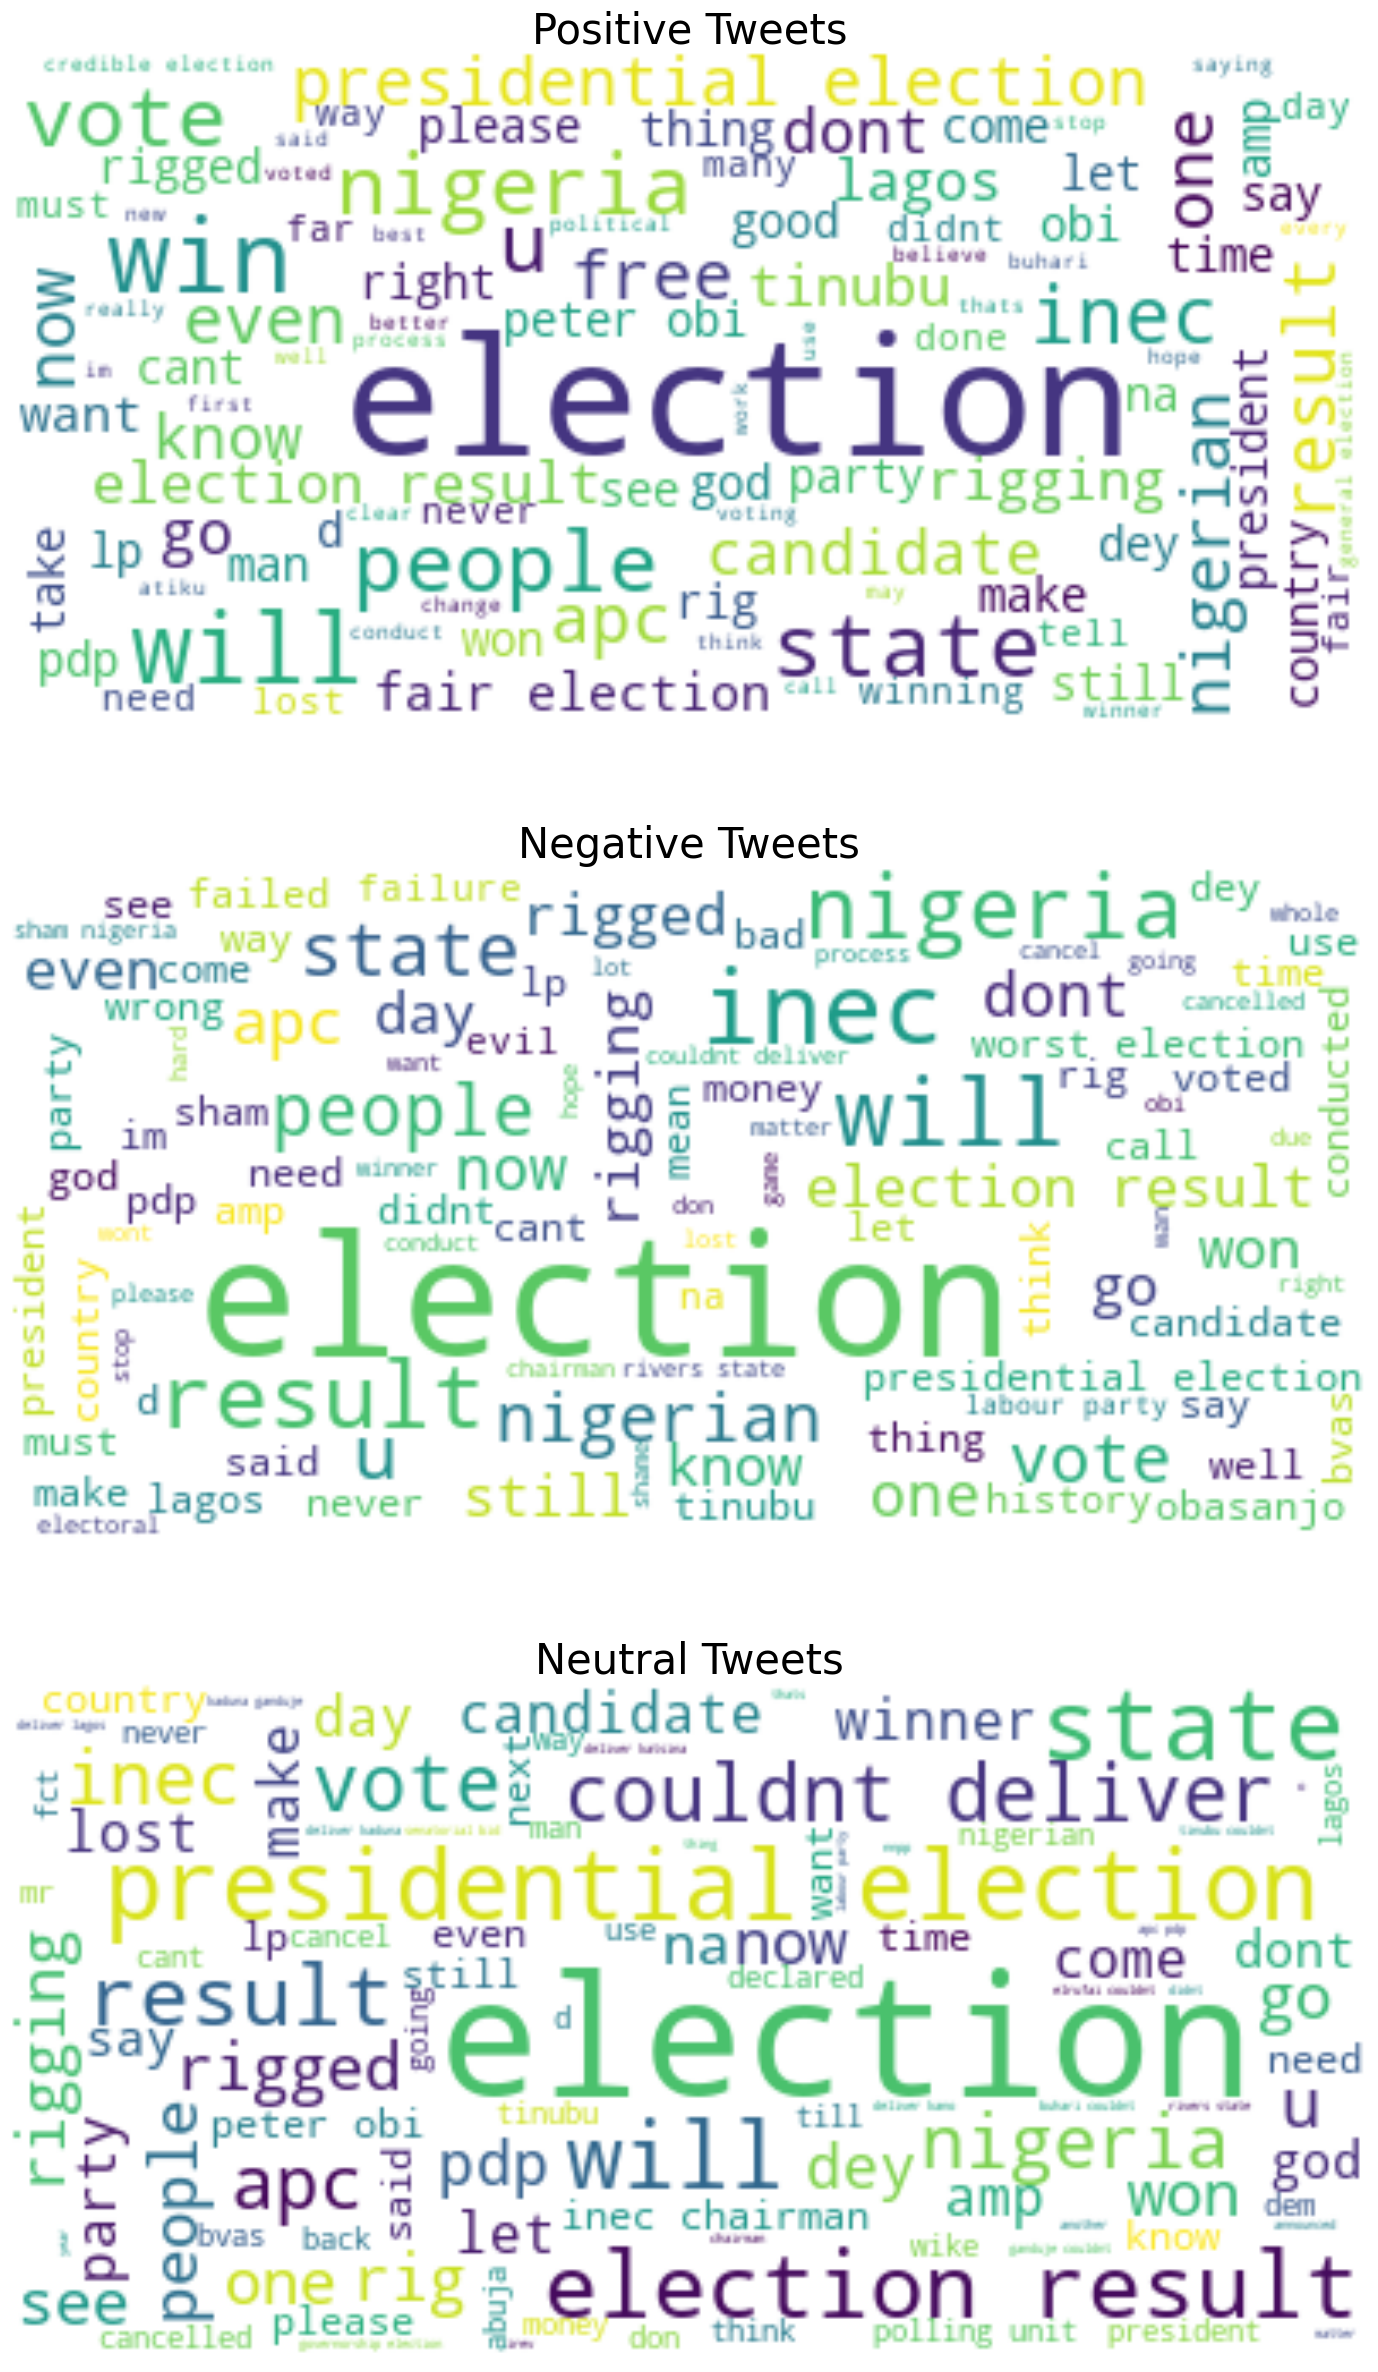

In [68]:
fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_positive)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_negative)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neutral)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Neutral Tweets',fontsize=30)
ax[2].axis('off')